In [1]:
#from __future__ import absolute_import, division, print_function
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
#import json, sys, random
import json
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2, l1
import tensorflow as tf

Using TensorFlow backend.


In [6]:
import json
import numpy as np

In [4]:
f_plane = open('data/planesnet.json')
plane_dataset = json.load(f_plane)
f_plane.close()

plane_dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

데이터 구성 : 비행기 8000개, 자연 이미지 8000개, 비행기의 일부분8000개, 비행기와 유사한 물체 8000개


In [7]:
plane_x = np.array(plane_dataset['data']).astype('uint8')
plane_y = np.array(plane_dataset['labels']).astype('uint8')
plane_yy = np.array(plane_dataset['labels']).astype('uint8')

In [8]:
plane_x.shape

(32000, 1200)

In [10]:
plane_x

array([[206, 195, 187, ..., 224, 194, 164],
       [215, 209, 200, ..., 205, 207, 210],
       [204, 214, 220, ..., 167, 163, 157],
       ...,
       [121, 121, 119, ..., 175, 178, 156],
       [172, 190, 202, ..., 210, 203, 192],
       [161, 172, 189, ..., 137, 123, 140]], dtype=uint8)

In [11]:
plane_x = plane_x.reshape([-1, 3, 20, 20]).transpose([0,2,3,1])
plane_x.shape

(32000, 20, 20, 3)

In [12]:
plane_y = tf.keras.utils.to_categorical(plane_y)
plane_y.shape

NameError: name 'tf' is not defined

In [9]:
plane_x = plane_x / 255.0

In [10]:
plane_classes = {0: 'No Plane',
                 1: 'Plane'}

In [11]:
plane_x_train, plane_x_test, plane_y_train, plane_y_test = train_test_split(plane_x,plane_y,test_size = 0.2)

In [12]:
input_shape = (20, 20, 3)

model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = input_shape , padding = 'same'))
model.add(Conv2D(64,(5,5), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(5,5), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = tf.nn.relu))
model.add(Dropout(0.35))
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.35))
model.add(Dense(2, activation = tf.nn.softmax))
    
model.summary()
   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [13]:
training_plane = model

training_plane.compile(optimizer = Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
aaa = model.fit(plane_x_train, plane_y_train, epochs=30, batch_size=256, validation_data=(plane_x_test,plane_y_test))

Train on 25600 samples, validate on 6400 samples
Epoch 1/30
25600/25600 [==============================] - 9s 349us/step - loss: 0.4938 - accuracy: 0.7658 - val_loss: 0.3075 - val_accuracy: 0.8683
Epoch 2/30
25600/25600 [==============================] - 5s 176us/step - loss: 0.2314 - accuracy: 0.9038 - val_loss: 0.1920 - val_accuracy: 0.9178
Epoch 3/30
25600/25600 [==============================] - 4s 173us/step - loss: 0.1532 - accuracy: 0.9416 - val_loss: 0.1337 - val_accuracy: 0.9441
Epoch 4/30
25600/25600 [==============================] - 4s 172us/step - loss: 0.1190 - accuracy: 0.9539 - val_loss: 0.0902 - val_accuracy: 0.9655
Epoch 5/30
25600/25600 [==============================] - 4s 173us/step - loss: 0.1063 - accuracy: 0.9595 - val_loss: 0.0943 - val_accuracy: 0.9631
Epoch 6/30
25600/25600 [==============================] - 4s 170us/step - loss: 0.1171 - accuracy: 0.9546 - val_loss: 0.0863 - val_accuracy: 0.9666
Epoch 7/30
25600/25600 [==============================] - 4s 17

In [15]:
model.evaluate(plane_x_train, plane_y_train)

classification_plane = model.predict(plane_x_train)

25600/25600 [==============================] - 3s 131us/step


In [16]:
classification_plane

array([[9.9999785e-01, 2.1383717e-06],
       [4.2073861e-02, 9.5792615e-01],
       [1.0000000e+00, 2.3000539e-09],
       ...,
       [1.0000000e+00, 1.0869708e-08],
       [1.7083781e-06, 9.9999833e-01],
       [7.6580781e-01, 2.3419225e-01]], dtype=float32)

In [17]:
plane_yy

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [18]:
print('실제 {}.'.format(plane_classes[plane_yy[1]]))

print('예측 {}.'.format(plane_classes[np.argmax(classification_plane[1])]))

실제 Plane.
예측 Plane.


In [19]:
aaa.history

{'val_loss': [0.3074572020769119,
  0.19204331517219544,
  0.13369501650333404,
  0.0902183474600315,
  0.09434514045715332,
  0.08629183262586594,
  0.08993137151002883,
  0.07809774905443191,
  0.07276066303253174,
  0.06126626163721085,
  0.062363489717245105,
  0.051960961073637006,
  0.06571235552430153,
  0.09524167165160179,
  0.056571534126996996,
  0.05012422680854797,
  0.0599958024173975,
  0.07671867042779923,
  0.04991542868316173,
  0.050311100780963895,
  0.04313541941344738,
  0.057674750462174414,
  0.05202202271670103,
  0.04924692071974277,
  0.041029538325965405,
  0.05412965640425682,
  0.047047893181443215,
  0.057788245379924774,
  0.05173011858016253,
  0.04650797463953495],
 'val_accuracy': [0.8682812452316284,
  0.9178125262260437,
  0.9440624713897705,
  0.9654687643051147,
  0.9631249904632568,
  0.9665625095367432,
  0.9662500023841858,
  0.9704687595367432,
  0.973437488079071,
  0.9787499904632568,
  0.9784374833106995,
  0.9826562404632568,
  0.977187514

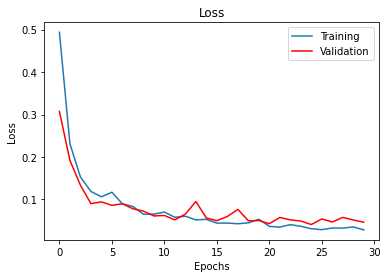

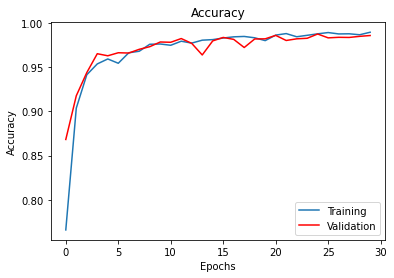

In [22]:
loss_plane = aaa.history['loss']
val_loss_plane = aaa.history['val_loss']
acc_plane = aaa.history['accuracy']
val_acc_plane = aaa.history['val_accuracy']

plt.plot(loss_plane)
plt.plot(val_loss_plane, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

plt.plot(acc_plane)
plt.plot(val_acc_plane, 'r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)